In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
dataset_path = '/content/drive/MyDrive/bone2/' 
categories = ['normal','Osteoarthritis', 'osteoporosis', 'Bone cancer'] 


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
dataset_path = '/content/drive/MyDrive/bone2/'
categories = ['normal', 'Osteoarthritis', 'osteoporosis', 'Bone cancer']
dict_lists = [  
    [os.path.join(dataset_path, 'normal')],
    [os.path.join(dataset_path, 'osteoporosis')],
    [os.path.join(dataset_path, 'Osteoarthritis')],
    [os.path.join(dataset_path, 'Bone cancer')]
]

filepaths = []
labels = []
for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        if os.path.exists(j):  
            flist = os.listdir(j)
            for f in flist:
                fpath = os.path.join(j, f)
                filepaths.append(fpath)
                labels.append(categories[i])
        else:
            print(f"Directory {j} does not exist")
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
bone = pd.concat([Fseries, Lseries], axis=1)
print(bone.head(721))
print(bone["labels"].value_counts())


                                             filepaths        labels
0           /content/drive/MyDrive/bone2/normal/62.jpg        normal
1           /content/drive/MyDrive/bone2/normal/77.jpg        normal
2            /content/drive/MyDrive/bone2/normal/7.jpg        normal
3           /content/drive/MyDrive/bone2/normal/71.jpg        normal
4         /content/drive/MyDrive/bone2/normal/91n.JPEG        normal
..                                                 ...           ...
716  /content/drive/MyDrive/bone2/Osteoarthritis/Im...  osteoporosis
717  /content/drive/MyDrive/bone2/Osteoarthritis/Im...  osteoporosis
718  /content/drive/MyDrive/bone2/Osteoarthritis/Im...  osteoporosis
719  /content/drive/MyDrive/bone2/Osteoarthritis/Im...  osteoporosis
720  /content/drive/MyDrive/bone2/Osteoarthritis/Im...  osteoporosis

[721 rows x 2 columns]
labels
osteoporosis      738
Bone cancer       555
normal            196
Osteoarthritis    186
Name: count, dtype: int64


In [ ]:
train_data, remaining_data = train_test_split(bone, test_size=0.2, random_state=42)
test_data, val_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(1316, 2)
(164, 2)
(165, 2)


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
X_train = []
y_train = []
for i in range(len(train_data)):
    img = cv2.imread(train_data['filepaths'].iloc[i])
    img = cv2.resize(img, (150, 150))  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X_train.append(img)
    y_train.append(train_data['labels'].iloc[i])
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], 150, 150, 1))

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

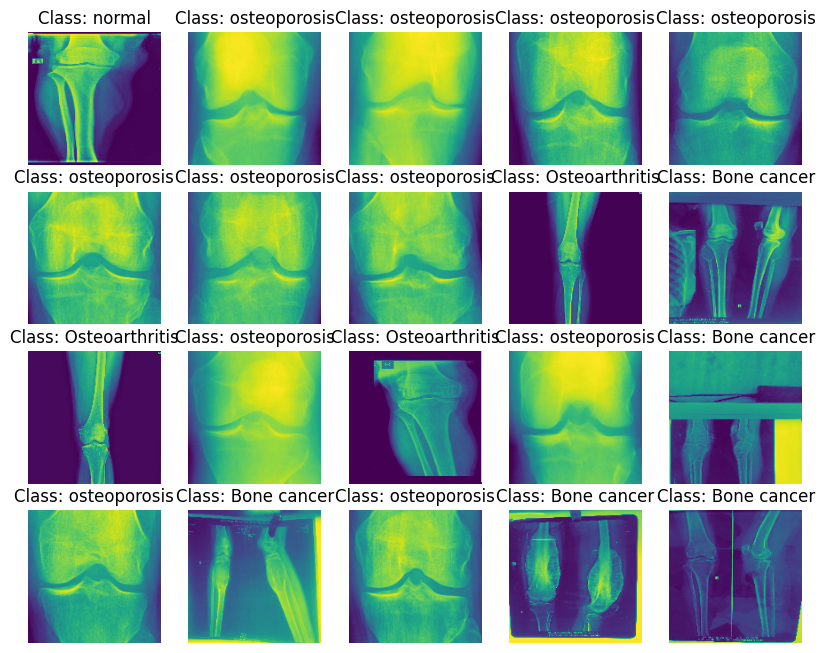

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1) 
    plt.imshow(X_train[i])
    plt.title(f"Class: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from tensorflow.keras.utils import to_categorical
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',  
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  
    subset='training'
)

validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

model = Sequential()

# Convolution + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten + Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax')) 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1317 images belonging to 4 classes.
Found 328 images belonging to 4 classes.
Found 1645 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classes=list(train_generator.class_indices.keys()) 
print (classes)

['Bone cancer', 'Osteoarthritis', 'normal', 'osteoporosis']


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(train_generator.classes),
                                    y=train_generator.classes)

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,
                    verbose=1,
                    class_weight=class_weights_dict)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 313ms/step - accuracy: 0.9634 - loss: 0.1953 - val_accuracy: 0.9390 - val_loss: 0.2486
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.9652 - loss: 0.1461 - val_accuracy: 0.9512 - val_loss: 0.2258
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - accuracy: 0.9703 - loss: 0.1407 - val_accuracy: 0.9421 - val_loss: 0.2582
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 27s 453ms/step - accuracy: 0.9658 - loss: 0.1451 - val_accuracy: 0.9207 - val_loss: 0.2108
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 38s 378ms/step - accuracy: 0.9779 - loss: 0.1132 - val_accuracy: 0.9268 - val_loss: 0.2714
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 366ms/step - accuracy: 0.9820 - loss: 0.1039 - val_accuracy: 0.9299 - val_loss: 0.2981
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 309ms/step - accuracy: 0.9798 - loss: 0.0974 - val_accuracy: 0.9421 - val_loss: 0.2836
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 314ms/step - accuracy: 0.9864 - loss: 0.0888 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=0) 
print("Test Accuracy:", test_acc)
print("Test loss:",test_loss)

Test Accuracy: 0.9805471301078796
Test loss: 0.07208430767059326


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


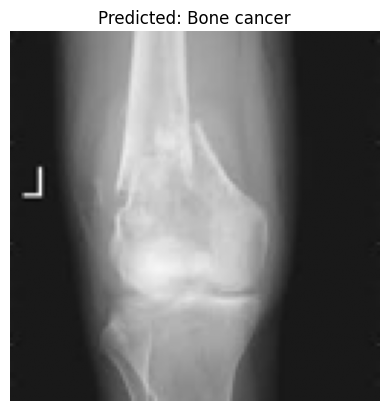

In [ ]:
def load_and_preprocess_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB') 
    except Image.UnidentifiedImageError: 
        print(f"Could not open or read image: {image_path}")
        return None
    image = image.resize((224, 224))  
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array
def predict_on_user_image(image_path, model, classes):
    image = load_and_preprocess_image(image_path)
    if image is None:
        return 
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    plt.imshow(np.squeeze(image))  
    plt.title(f'Predicted: {classes[predicted_class[0]]}')
    plt.axis('off')
    plt.show()
image_path = '/content/drive/MyDrive/bone cancer.jpeg'  
predict_on_user_image(image_path, model, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


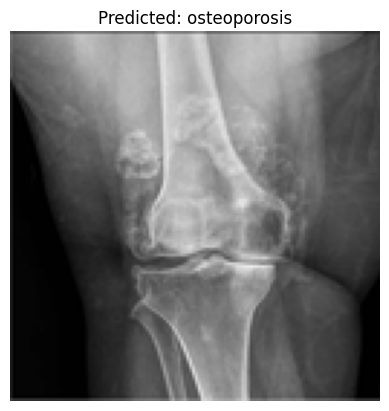

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
def load_and_preprocess_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB') 
    except Image.UnidentifiedImageError: 
        print(f"Could not open or read image: {image_path}")
        return None
    image = image.resize((128, 128))  
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array
def predict_on_user_image(image_path, model, classes):
    image = load_and_preprocess_image(image_path)
    if image is None:
        return 
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    plt.imshow(np.squeeze(image))  
    plt.title(f'Predicted: {classes[predicted_class[0]]}')
    plt.axis('off')
    plt.show()
image_path = '/content/drive/MyDrive/st.jpg'  
predict_on_user_image(image_path, model, classes)

In [ ]:
pred = model.predict(test_generator) 
pred = np.argmax(pred, axis=1)
labels = (train_generator.class_indices) 
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 276ms/step


In [ ]:
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 279ms/step
Classification Report:
                precision    recall  f1-score   support

   Bone cancer       1.00      1.00      1.00       545
Osteoarthritis       1.00      1.00      1.00       728
        normal       0.95      0.83      0.89       186
  osteoporosis       0.86      0.96      0.91       186

      accuracy                           0.98      1645
     macro avg       0.95      0.95      0.95      1645
  weighted avg       0.98      0.98      0.98      1645

Accuracy: 0.9757
Precision: 0.9770
Recall: 0.9757
F1-Score: 0.9756


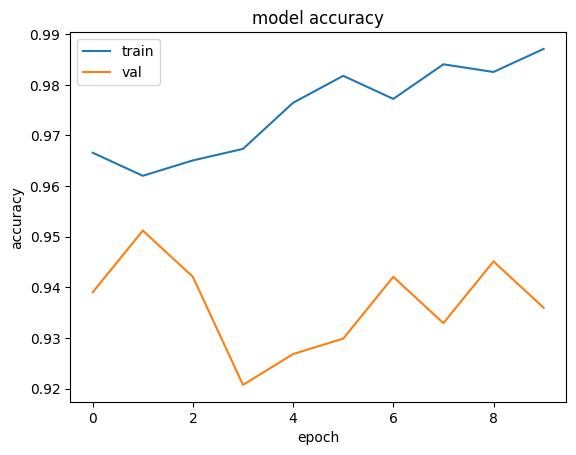

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 290ms/step


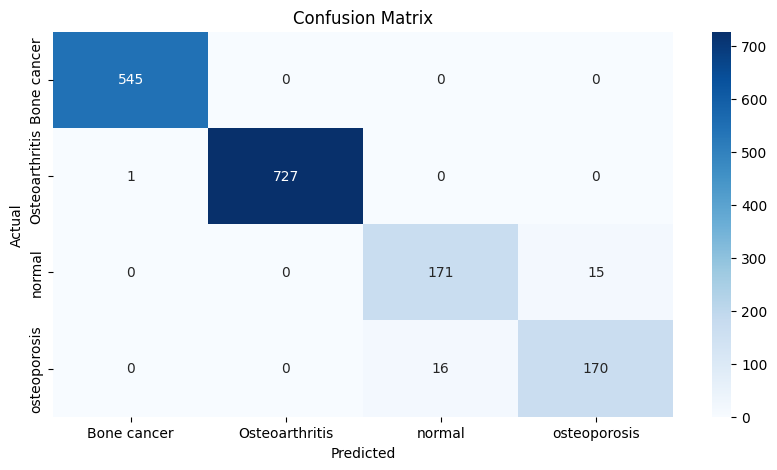

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_labels = ['Bone cancer', 'Osteoarthritis', 'normal', 'osteoporosis']
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from tensorflow import keras
model.save('/content/drive/MyDrive/cnn_model.h5')  


## vgg16model

In [ ]:
dataset_path = '/content/drive/MyDrive/bone2/'  
categories = ['normal','Osteoarthritis', 'osteoporosis', 'Bone cancer']  


In [ ]:

import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
dataset_path = '/content/drive/MyDrive/bone2/'
categories = ['normal', 'Osteoarthritis', 'osteoporosis', 'Bone cancer']
dict_lists = [  
    [os.path.join(dataset_path, 'normal')],
    [os.path.join(dataset_path, 'osteoporosis')],
    [os.path.join(dataset_path, 'Osteoarthritis')],
    [os.path.join(dataset_path, 'Bone cancer')]
]
filepaths = []
labels = []
for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        if os.path.exists(j):  
            flist = os.listdir(j)
            for f in flist:
                fpath = os.path.join(j, f)
                filepaths.append(fpath)
                labels.append(categories[i])
        else:
            print(f"Directory {j} does not exist")
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
bone = pd.concat([Fseries, Lseries], axis=1)
print(bone.head(721))
print(bone["labels"].value_counts())


                                             filepaths        labels
0           /content/drive/MyDrive/bone2/normal/62.jpg        normal
1           /content/drive/MyDrive/bone2/normal/77.jpg        normal
2            /content/drive/MyDrive/bone2/normal/7.jpg        normal
3           /content/drive/MyDrive/bone2/normal/71.jpg        normal
4         /content/drive/MyDrive/bone2/normal/91n.JPEG        normal
..                                                 ...           ...
716  /content/drive/MyDrive/bone2/Osteoarthritis/Im...  osteoporosis
717  /content/drive/MyDrive/bone2/Osteoarthritis/Im...  osteoporosis
718  /content/drive/MyDrive/bone2/Osteoarthritis/Im...  osteoporosis
719  /content/drive/MyDrive/bone2/Osteoarthritis/Im...  osteoporosis
720  /content/drive/MyDrive/bone2/Osteoarthritis/Im...  osteoporosis

[721 rows x 2 columns]
labels
osteoporosis      738
Bone cancer       555
normal            196
Osteoarthritis    186
Name: count, dtype: int64


In [ ]:
train_data, remaining_data = train_test_split(bone, test_size=0.2, random_state=42)
test_data, val_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

In [ ]:

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(1340, 2)
(167, 2)
(168, 2)


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
X_train = []
y_train = []
for i in range(len(train_data)):
    img = cv2.imread(train_data['filepaths'].iloc[i])
    img = cv2.resize(img, (150, 150))  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X_train.append(img)
    y_train.append(train_data['labels'].iloc[i])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], 150, 150, 1))

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

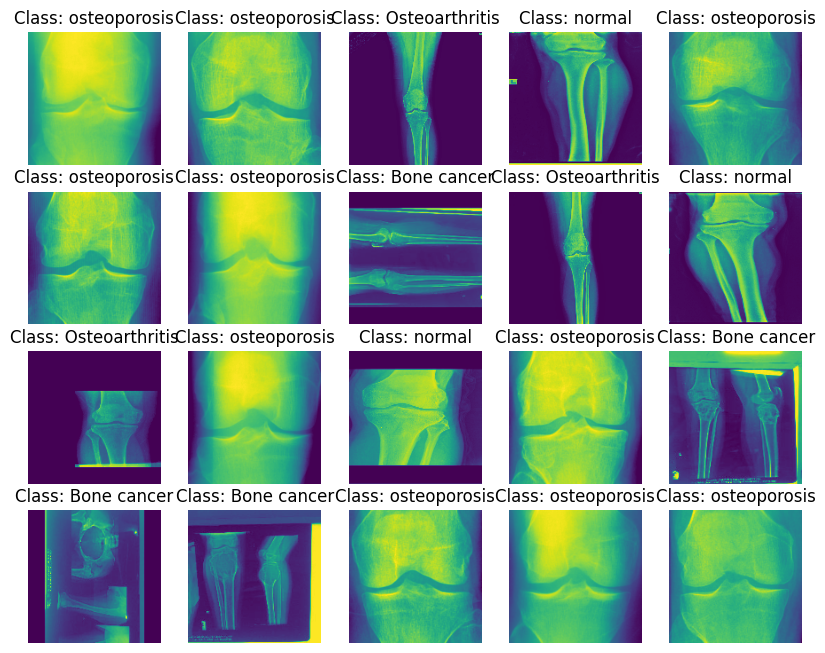

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1) 
    plt.imshow(X_train[i])
    plt.title(f"Class: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',  
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16.trainable = False
model = Sequential()
model.add(vgg16)
model.add(GlobalAveragePooling2D())

# Add a fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add the final output layer with softmax for multi-class classification
model.add(Dense(train_generator.num_classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



Found 1341 images belonging to 4 classes.
Found 334 images belonging to 4 classes.
Found 1675 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
import numpy as np 
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(train_generator.classes),
                                    y=train_generator.classes)

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,
                    verbose=1,
                    class_weight=class_weights_dict)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.2839 - loss: 1.4767 - val_accuracy: 0.3653 - val_loss: 1.2786
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 77s 409ms/step - accuracy: 0.3823 - loss: 1.3299 - val_accuracy: 0.8772 - val_loss: 1.1600
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 411ms/step - accuracy: 0.4922 - loss: 1.2319 - val_accuracy: 0.8862 - val_loss: 1.0852
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 382ms/step - accuracy: 0.6025 - loss: 1.1787 - val_accuracy: 0.8892 - val_loss: 0.9936
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 415ms/step - accuracy: 0.6700 - loss: 1.0767 - val_accuracy: 0.8772 - val_loss: 0.9127
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - accuracy: 0.7328 - loss: 1.0878 - val_accuracy: 0.8892 - val_loss: 0.8349
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 394ms/step - accuracy: 0.7683 - loss: 0.9815 - val_accuracy: 0.8743 - val_loss: 0.7860
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 373ms/step - accuracy: 0.8179 - loss: 0.9138 - val_accuracy: 0.8922 

In [ ]:
history1 = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=5,
                    verbose=1,
                    class_weight=class_weights_dict)

Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 437ms/step - accuracy: 0.8781 - loss: 0.7963 - val_accuracy: 0.8952 - val_loss: 0.5780
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 378ms/step - accuracy: 0.9033 - loss: 0.7347 - val_accuracy: 0.8832 - val_loss: 0.5512
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 385ms/step - accuracy: 0.8892 - loss: 0.7216 - val_accuracy: 0.8862 - val_loss: 0.5130
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 396ms/step - accuracy: 0.8937 - loss: 0.6843 - val_accuracy: 0.8922 - val_loss: 0.4780
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 427ms/step - accuracy: 0.8939 - loss: 0.6489 - val_accuracy: 0.8922 - val_loss: 0.4571


In [ ]:
history2= model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=5,
                    verbose=1,
                    class_weight=class_weights_dict)

Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 410ms/step - accuracy: 0.9213 - loss: 0.5232 - val_accuracy: 0.9132 - val_loss: 0.3373
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - accuracy: 0.9080 - loss: 0.5484 - val_accuracy: 0.9102 - val_loss: 0.3190
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - accuracy: 0.9176 - loss: 0.5010 - val_accuracy: 0.9192 - val_loss: 0.3094
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.9231 - loss: 0.4666 - val_accuracy: 0.9222 - val_loss: 0.2945
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 396ms/step - accuracy: 0.9216 - loss: 0.4568 - val_accuracy: 0.9192 - val_loss: 0.2931


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=0) 
print("Test Accuracy:", test_acc)
print("Test loss:",test_loss)

Test Accuracy: 0.9247761368751526
Test loss: 0.28000906109809875


In [ ]:
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 374ms/step
Classification Report:
                precision    recall  f1-score   support

   Bone cancer       1.00      0.98      0.99       555
Osteoarthritis       0.99      1.00      1.00       738
        normal       0.69      0.73      0.71       196
  osteoporosis       0.69      0.67      0.68       186

      accuracy                           0.92      1675
     macro avg       0.84      0.84      0.84      1675
  weighted avg       0.93      0.92      0.93      1675

Accuracy: 0.9248
Precision: 0.9257
Recall: 0.9248
F1-Score: 0.9251


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


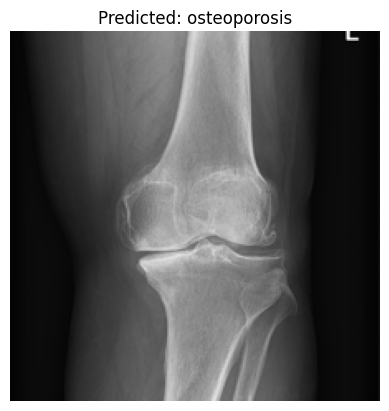

In [ ]:
from PIL import Image 
def load_and_preprocess_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB') 
    except Image.UnidentifiedImageError: 
        print(f"Could not open or read image: {image_path}")
        return None
    image = image.resize((224, 224)) 
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    return image_array
def predict_on_user_image(image_path, model, classes):
    image = load_and_preprocess_image(image_path)
    if image is None:
        return 
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    plt.imshow(np.squeeze(image)) 
    plt.title(f'Predicted: {classes[predicted_class[0]]}')
    plt.axis('off')
    plt.show()
image_path = '/content/drive/MyDrive/kk.jpeg'  
predict_on_user_image(image_path, model, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


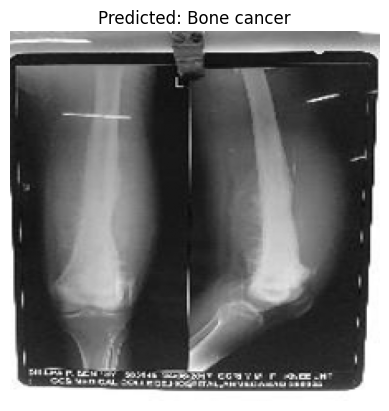

In [ ]:
from PIL import Image 
def load_and_preprocess_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB') 
    except Image.UnidentifiedImageError: 
        print(f"Could not open or read image: {image_path}")
        return None
    image = image.resize((224, 224))  
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    return image_array
def predict_on_user_image(image_path, model, classes):
    image = load_and_preprocess_image(image_path)
    if image is None:
        return 
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    plt.imshow(np.squeeze(image))  
    plt.title(f'Predicted: {classes[predicted_class[0]]}')
    plt.axis('off')
    plt.show()
image_path = '/content/drive/MyDrive/bone2/Bone cancer/10_jpg.rf.dae5581fddd424b3e4568af98b24a732.jpg'  
predict_on_user_image(image_path, model, classes)

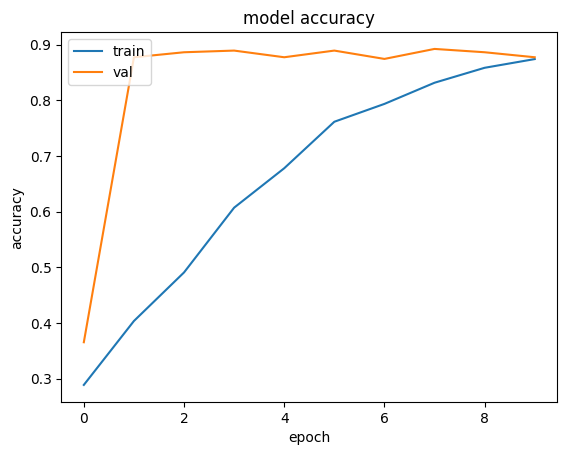

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step


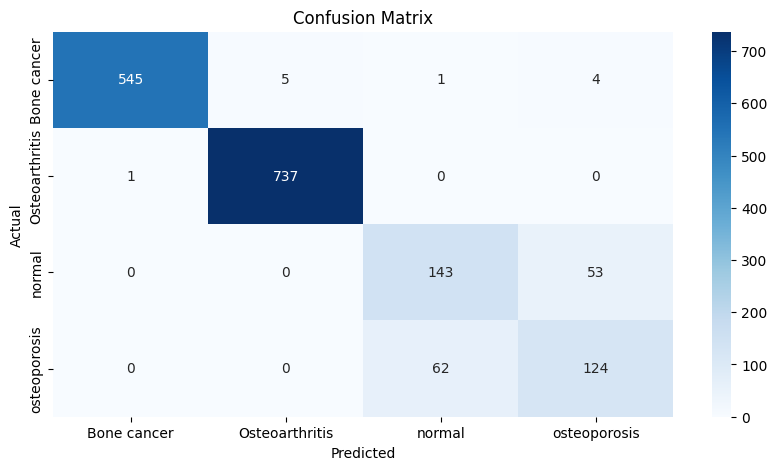

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_labels = ['Bone cancer', 'Osteoarthritis', 'normal', 'osteoporosis']
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from tensorflow import keras
model.save('/content/drive/MyDrive/vg16.h5')  


# densenet

In [ ]:
dataset_path = '/content/drive/MyDrive/bone2/'  
categories = ['normal','Osteoarthritis', 'osteoporosis', 'Bone cancer']  


In [ ]:

import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
dataset_path = '/content/drive/MyDrive/bone2/'
categories = ['normal', 'Osteoarthritis', 'osteoporosis', 'Bone cancer']
dict_lists = [ 
    [os.path.join(dataset_path, 'normal')],
    [os.path.join(dataset_path, 'osteoporosis')],
    [os.path.join(dataset_path, 'Osteoarthritis')],
    [os.path.join(dataset_path, 'Bone cancer')]
]

filepaths = []
labels = []

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        if os.path.exists(j): 
            flist = os.listdir(j)
            for f in flist:
                fpath = os.path.join(j, f)
                filepaths.append(fpath)
                labels.append(categories[i])
        else:
            print(f"Directory {j} does not exist")
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
bone = pd.concat([Fseries, Lseries], axis=1)
print(bone.head(300))
print(bone["labels"].value_counts())


                                             filepaths          labels
0           /content/drive/MyDrive/bone2/normal/62.jpg          normal
1           /content/drive/MyDrive/bone2/normal/77.jpg          normal
2            /content/drive/MyDrive/bone2/normal/7.jpg          normal
3           /content/drive/MyDrive/bone2/normal/71.jpg          normal
4         /content/drive/MyDrive/bone2/normal/91n.JPEG          normal
..                                                 ...             ...
295  /content/drive/MyDrive/bone2/osteoporosis/226.png  Osteoarthritis
296  /content/drive/MyDrive/bone2/osteoporosis/215.jpg  Osteoarthritis
297  /content/drive/MyDrive/bone2/osteoporosis/263.png  Osteoarthritis
298  /content/drive/MyDrive/bone2/osteoporosis/217.jpg  Osteoarthritis
299  /content/drive/MyDrive/bone2/osteoporosis/207.jpg  Osteoarthritis

[300 rows x 2 columns]
labels
osteoporosis      738
Bone cancer       555
normal            196
Osteoarthritis    186
Name: count, dtype: int64


In [ ]:
train_data, remaining_data = train_test_split(bone, test_size=0.2, random_state=42)
test_data, val_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

In [ ]:

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(1340, 2)
(167, 2)
(168, 2)


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

X_train = []
y_train = []


In [ ]:
for i in range(len(train_data)):
    img = cv2.imread(train_data['filepaths'].iloc[i])
    img = cv2.resize(img, (150, 150))  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X_train.append(img)
    y_train.append(train_data['labels'].iloc[i])

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], 150, 150, 1))

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

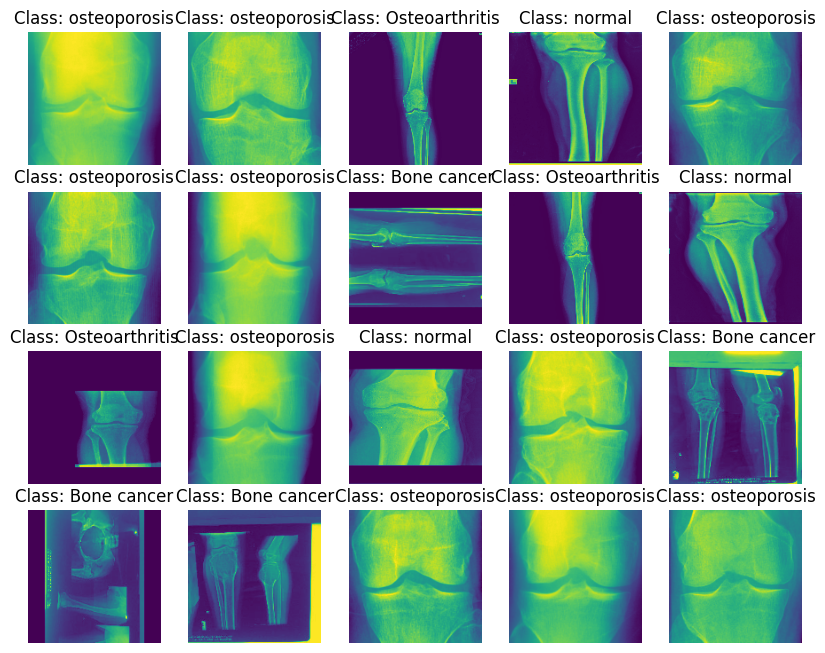

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1) 
    plt.imshow(X_train[i])
    plt.title(f"Class: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  
test_datagen = ImageDataGenerator(rescale=1./255)  
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/bone2/',
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical',
    subset='training'  
)
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/bone2/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/bone2/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)  
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer with number of classes
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Found 1341 images belonging to 4 classes.
Found 334 images belonging to 4 classes.
Found 1675 images belonging to 4 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 8,091,204 (30.87 MB)

 Trainable params: 1,053,700 (4.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
classes=list(train_generator.class_indices.keys()) 
print (classes)

['Bone cancer', 'Osteoarthritis', 'normal', 'osteoporosis']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)
from tensorflow.keras.applications import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Found 1341 images belonging to 4 classes.
Found 334 images belonging to 4 classes.
Found 1675 images belonging to 4 classes.
Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 396s 8s/step - accuracy: 0.7817 - loss: 0.6073 - val_accuracy: 0.9187 - val_loss: 0.1619
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.8125 - loss: 0.3640 - val_accuracy: 0.8571 - val_loss: 0.6773
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 325s 8s/step - accuracy: 0.9218 - loss: 0.1774 - val_accuracy: 0.9656 - val_loss: 0.1118
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9688 - loss: 0.1003 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 336s 8s/step - accuracy: 0.9448 - loss: 0.1035 - val_accuracy: 0.9312 - val_loss: 0.1337
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.8750 - loss: 0.1791 - val_accuracy: 1.0000 - val_loss: 0.0343
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 363s 8s/step - accuracy: 0.9473 - loss: 0.1299 - val_accuracy: 0.9688 - va

In [ ]:

test_loss, test_acc = model.evaluate(test_generator, verbose=0) 
print("Test Accuracy:", test_acc)
print("Test loss:",test_loss)

Test Accuracy: 0.9319403171539307
Test loss: 0.1280849575996399


In [ ]:

y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


53/53 ━━━━━━━━━━━━━━━━━━━━ 362s 7s/step
Classification Report:
                precision    recall  f1-score   support

   Bone cancer       1.00      1.00      1.00       555
Osteoarthritis       1.00      1.00      1.00       738
        normal       0.63      0.99      0.77       196
  osteoporosis       0.99      0.39      0.56       186

      accuracy                           0.93      1675
     macro avg       0.90      0.85      0.83      1675
  weighted avg       0.96      0.93      0.92      1675

Accuracy: 0.9319
Precision: 0.9556
Recall: 0.9319
F1-Score: 0.9248


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


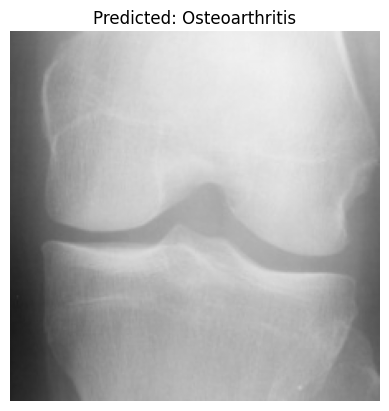

In [ ]:
from PIL import Image L
def load_and_preprocess_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB') 
    except Image.UnidentifiedImageError: 
        print(f"Could not open or read image: {image_path}")
        return None
    image = image.resize((224, 224))  
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    return image_array
def predict_on_user_image(image_path, model, classes):
    image = load_and_preprocess_image(image_path)
    if image is None:
        return 
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    plt.imshow(np.squeeze(image))  
    plt.title(f'Predicted: {classes[predicted_class[0]]}')
    plt.axis('off')
    plt.show()
image_path = '/content/drive/MyDrive/bone2/Osteoarthritis/Image_1000.jpg'  
predict_on_user_image(image_path, model, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


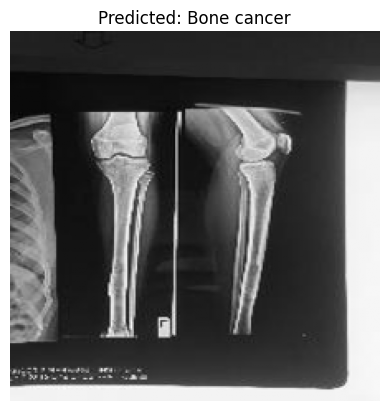

In [ ]:

def load_and_preprocess_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB') 
    except Image.UnidentifiedImageError: 
        print(f"Could not open or read image: {image_path}")
        return None
    image = image.resize((224, 224))  
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    return image_array
def predict_on_user_image(image_path, model, classes):
    image = load_and_preprocess_image(image_path)
    if image is None:
        return 
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    plt.imshow(np.squeeze(image))  
    plt.title(f'Predicted: {classes[predicted_class[0]]}')
    plt.axis('off')
    plt.show()
image_path = '/content/drive/MyDrive/bone2/Bone cancer/121_JPG.rf.0f59e90b080fffa7b17de653005709a2.jpg' 
predict_on_user_image(image_path, model, classes)

53/53 ━━━━━━━━━━━━━━━━━━━━ 37s 438ms/step


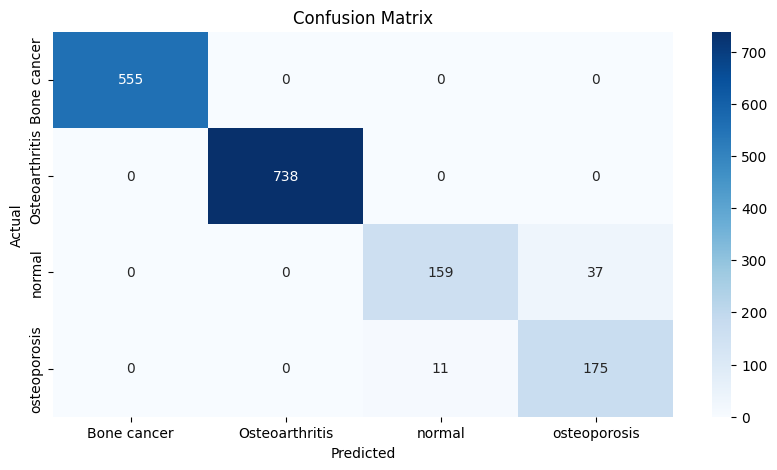

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_labels = ['Bone cancer', 'Osteoarthritis', 'normal', 'osteoporosis']
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

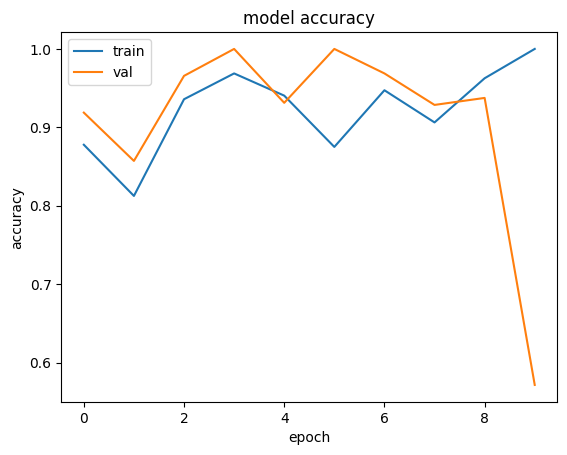

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


# inception

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',  
    target_size=(299, 299),  
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/bone2/',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
inception.trainable = False
model = Sequential()
model.add(inception)
model.add(GlobalAveragePooling2D())

# Add a fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add the final output layer with softmax for multi-class classification
model.add(Dense(train_generator.num_classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



Found 1341 images belonging to 4 classes.
Found 334 images belonging to 4 classes.
Found 1675 images belonging to 4 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import numpy as np 
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(train_generator.classes),
                                    y=train_generator.classes)

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,
                    verbose=1,
                    class_weight=class_weights_dict)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 520s 12s/step - accuracy: 0.5072 - loss: 1.1987 - val_accuracy: 0.9401 - val_loss: 0.3726
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 529s 11s/step - accuracy: 0.8903 - loss: 0.5488 - val_accuracy: 0.9491 - val_loss: 0.2351
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 474s 11s/step - accuracy: 0.9297 - loss: 0.3489 - val_accuracy: 0.9521 - val_loss: 0.1903
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 471s 11s/step - accuracy: 0.9135 - loss: 0.3717 - val_accuracy: 0.9461 - val_loss: 0.1545
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 504s 11s/step - accuracy: 0.9495 - loss: 0.2679 - val_accuracy: 0.9491 - val_loss: 0.1555
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 501s 11s/step - accuracy: 0.9321 - loss: 0.3068 - val_accuracy: 0.9521 - val_loss: 0.1434
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 502s 11s/step - accuracy: 0.9441 - loss: 0.2855 - val_accuracy: 0.9461 - val_loss: 0.1361
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 519s 12s/step - accuracy: 0.9473 - loss: 0.2746 - val_accuracy: 0.9551 - val_

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=0) 
print("Test Accuracy:", test_acc)
print("Test loss:",test_loss)

Test Accuracy: 0.9516417980194092
Test loss: 0.10775402188301086


In [ ]:
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


53/53 ━━━━━━━━━━━━━━━━━━━━ 483s 9s/step
Classification Report:
                precision    recall  f1-score   support

   Bone cancer       1.00      1.00      1.00       555
Osteoarthritis       1.00      1.00      1.00       738
        normal       0.93      0.64      0.76       196
  osteoporosis       0.71      0.95      0.82       186

      accuracy                           0.95      1675
     macro avg       0.91      0.90      0.89      1675
  weighted avg       0.96      0.95      0.95      1675

Accuracy: 0.9516
Precision: 0.9598
Recall: 0.9516
F1-Score: 0.9506


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


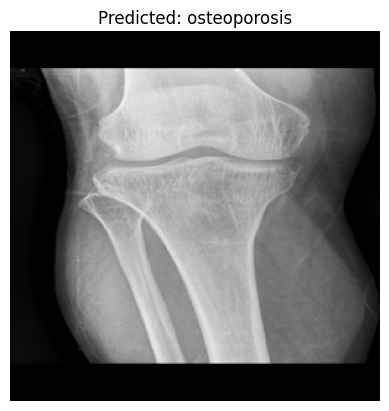

In [ ]:
from PIL import Image 
def load_and_preprocess_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB') 
    except Image.UnidentifiedImageError: 
        print(f"Could not open or read image: {image_path}")
        return None
    image = image.resize((299, 299))  
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    return image_array
def predict_on_user_image(image_path, model, classes):
    image = load_and_preprocess_image(image_path)
    if image is None:
        return 
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    plt.imshow(np.squeeze(image))  
    plt.title(f'Predicted: {classes[predicted_class[0]]}')
    plt.axis('off')
    plt.show()
image_path = '/content/drive/MyDrive/bone2/osteoporosis/106.JPEG' 
predict_on_user_image(image_path, model, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


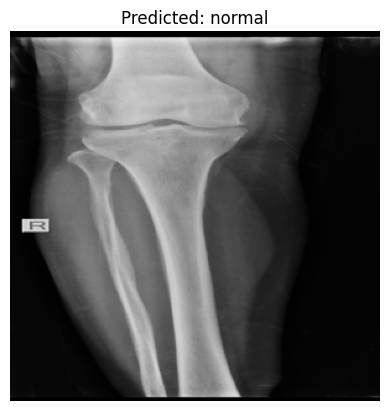

In [ ]:
from PIL import Image
def load_and_preprocess_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB') 
    except Image.UnidentifiedImageError: 
        print(f"Could not open or read image: {image_path}")
        return None
    image = image.resize((299, 299))  
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    return image_array
def predict_on_user_image(image_path, model, classes):
    image = load_and_preprocess_image(image_path)
    if image is None:
        return 
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    plt.imshow(np.squeeze(image)) 
    plt.title(f'Predicted: {classes[predicted_class[0]]}')
    plt.axis('off')
    plt.show()
image_path = '/content/drive/MyDrive/bone2/normal/107.jpg'  
predict_on_user_image(image_path, model, classes)

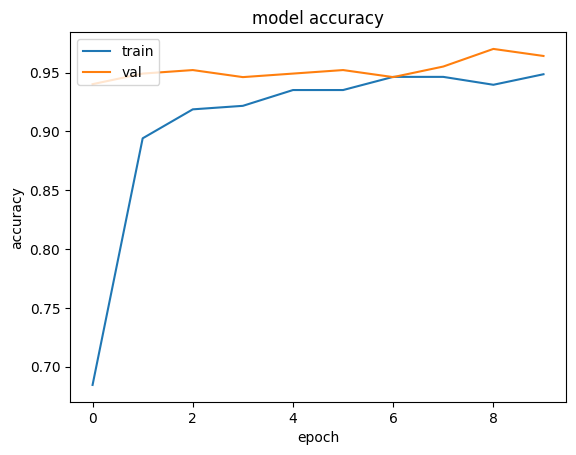

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


53/53 ━━━━━━━━━━━━━━━━━━━━ 493s 9s/step


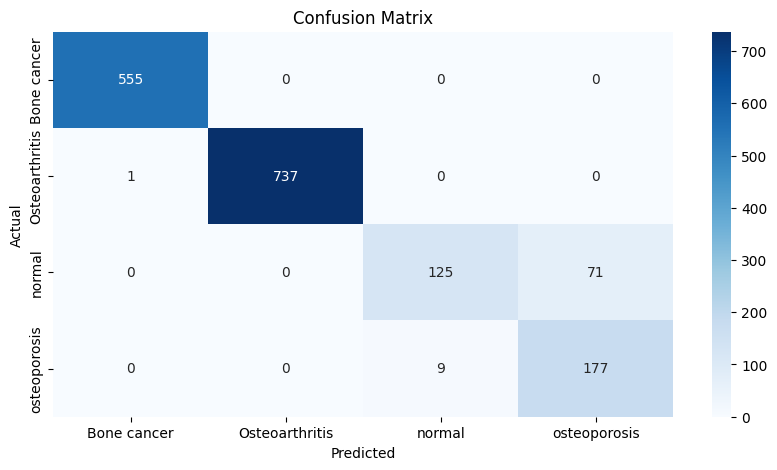

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_labels = ['Bone cancer', 'Osteoarthritis', 'normal', 'osteoporosis']
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()